# Random Forest Classifier Scenario: Loan Approval Prediction 

### A commercial bank wants to decide whether to approve a loan application. They have historical data about customers, including: 

Age (years) 

Income (annual income in local currency) 

Credit Score (300–850 scale) 

Loan Amount Requested (currency units) 

Loan Approved (Yes/No) 

The bank applies Random Forest, an ensemble method that builds multiple decision trees on different subsets of the data and aggregates their predictions. This helps reduce overfitting compared to a single tree and improves accuracy in predicting loan approvals for new applicants. 

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the synthetic data
df = pd.read_csv('loan_approvals_high_accuracy_100.csv')

# Prepare features/target
X = df[['Age', 'Income', 'Credit Score', 'Loan Amount Requested']]
y = (df['Loan Approved'].str.lower() == 'yes').astype(int)

# Stratified split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# (Optional) scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(Xtrain)
X_test_s  = scaler.transform(Xtest)

# Simple, strong Random Forest (no hyperparameter search)
clf = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
clf.fit(X_train_s, ytrain)

# Evaluate
y_pred = clf.predict(X_test_s)
print("Accuracy:", accuracy_score(ytest, y_pred))
print("\nClassification Report:\n", classification_report(ytest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred))


Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        18

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

Confusion Matrix:
 [[10  2]
 [ 2 16]]


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        18

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



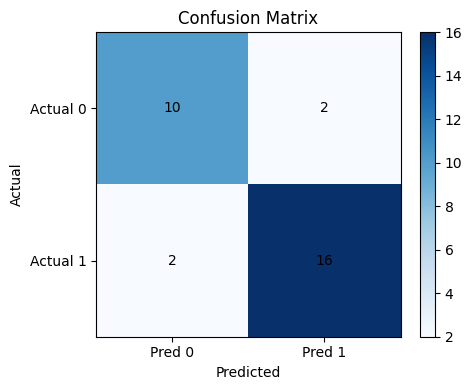

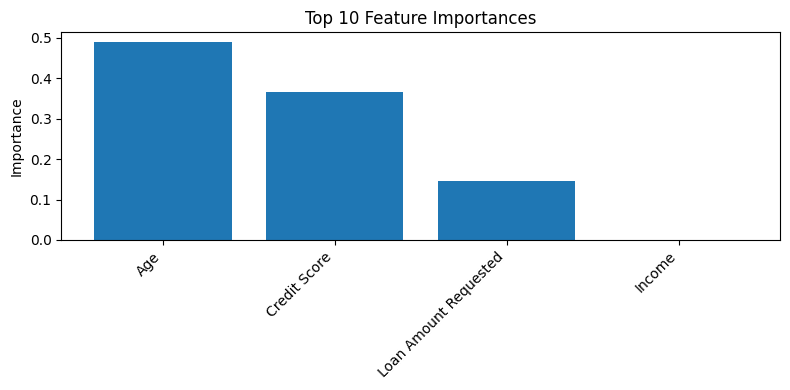

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# assumes: clf, X_test_s, Xtest, y_test, y_pred are defined
# If you used different variable names adapt them (e.g., X_test_s -> X_test_scaled)

print(classification_report(ytest, y_pred))

# Confusion matrix
cm = confusion_matrix(ytest, y_pred)
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(['Pred 0','Pred 1']); ax.set_yticklabels(['Actual 0','Actual 1'])
for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, int(v), ha='center', va='center')
ax.set_xlabel('Predicted'); ax.set_ylabel('Actual'); ax.set_title('Confusion Matrix')
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# Feature importances (top 10)
if hasattr(clf, "feature_importances_"):
    feat_names = X.columns if 'X' in globals() else [f"f{i}" for i in range(clf.n_features_)]
    fi = clf.feature_importances_
    idx = np.argsort(fi)[::-1][:10]
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(np.array(feat_names)[idx], fi[idx], color='C0')
    ax.set_title('Top 10 Feature Importances'); ax.set_ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
